In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import glob
import os
import random
import datetime
import re


glob.glob("studies/moralnet/*/")

['studies/moralnet/0001/', 'studies/moralnet/test_build/']

In [69]:
os.mkdir("studies/moralnet/topology_001")

In [74]:
dir_path = "studies/moralnet"


def is_topology_dir(p, d):
    return os.path.isdir(os.path.join(p, d)) and re.search("topology", d) is not None


topology_dirs = [d for d in os.listdir(dir_path) if is_topology_dir(dir_path, d)]

max([int(id.split("_")[1]) for id in topology_dirs])

1

Opened moralnet config.yml
Value of omega: 0.5085858871423723


FileNotFoundError: [Errno 2] No such file or directory: 'studies/moralnet/t00001/topology.png'

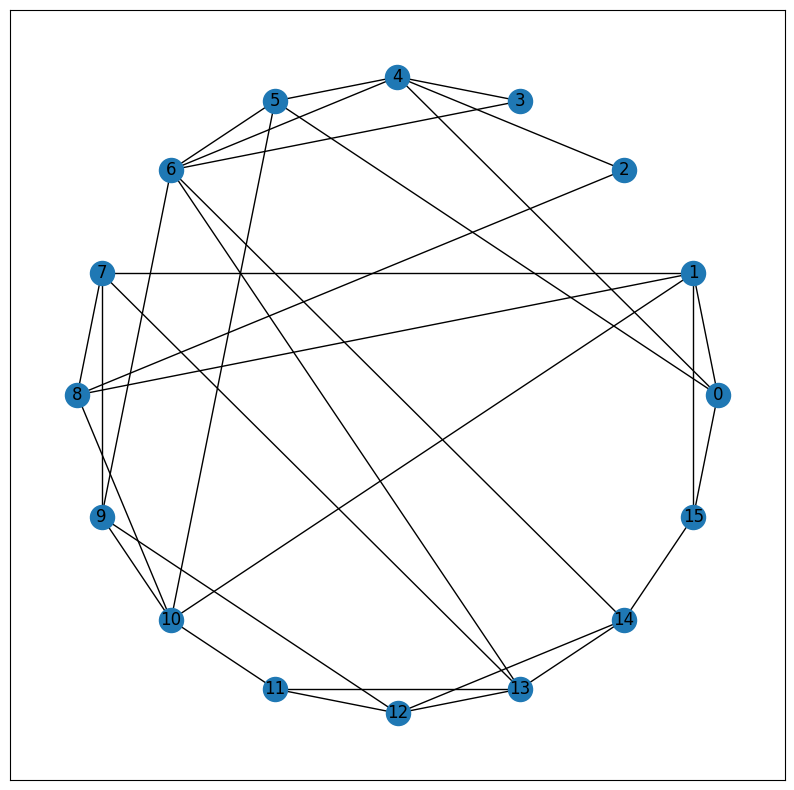

In [3]:
from src import generate

graphs = generate("moralnet", test=False, write=True)

In [5]:
nx.smallworld.omega(graphs[0])

0.5059128630705392

In [81]:
from copy import deepcopy

nodes = list(graphs[0].nodes())
edge_map = {
    node: set(edge_map[node]) for node in deepcopy(nx.to_dict_of_lists(graphs[0]))
}

edge_map

{0: {1, 2, 7, 14},
 1: {0, 3, 7, 15},
 2: {0, 3, 4},
 3: {1, 2, 5, 13},
 4: {2, 5, 6},
 5: {3, 4, 6, 15},
 6: {4, 5, 7, 8},
 7: {0, 1, 6, 9},
 8: {6, 9, 10, 11, 12},
 9: {7, 8, 10, 11, 15},
 10: {8, 9, 11, 12},
 11: {8, 9, 10, 13},
 12: {8, 10, 14},
 13: {3, 11, 14, 15},
 14: {0, 12, 13, 15},
 15: {1, 5, 9, 13, 14}}

In [82]:
nodes_in_round = set()
edges_in_round = list()

for node, others in edge_map.items():
    if node in nodes_in_round:
        continue

    available_others = others.difference(nodes_in_round)
    if len(available_others) == 0:
        print(f"Node {node} has no available others to pair with")
        continue

    paired_other = random.choice(tuple(available_others))

    nodes_in_round.update([node, paired_other])
    edges_in_round.append([node, paired_other])

In [83]:
edges_in_round

[[0, 1], [2, 3], [4, 6], [5, 15], [7, 9], [8, 10], [11, 13], [12, 14]]